Group Members: Juniper Ferlan, Thomas Curry, Andre Hu

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Playgrounds by Thomas Curry
<img src="images/Catalono_Playground.jpg" width="340"> <img src="images/Chadwick_Playground.jpg" width="350">


Something fun for a neiborhood to have is a Playground. I remember when I was a kid going out with my siblings and playing at my local playground. We all remember recess, playing at the school playground. Playgrounds are fun, so the lack of them must be boring. 

In [3]:
playgrounds = pd.read_csv("playgrounds.csv")
playgrounds.head(10)

_id          id                      name  type maintenance_responsibility  \
0    1   731501774      Able Long Playground   NaN            Parks - Western   
1    2  1461276747  Albert Graham Playground   NaN           Parks - Schenley   
2    3  1860709784         Alpine Playground   NaN           Parks - Northern   
3    4  1770671485          Alton Playground   NaN            Parks - Western   
4    5    18942817          Ammon Playground   NaN           Parks - Schenley   
5    6   230731204      Arlington Playground   NaN           Parks - Southern   
6    7   420573029      Armstrong Playground   NaN           Parks - Southern   
7    8   113170092        Arsenal Playground   NaN          Parks - Northeast   
8    9  2089697067  August WIlson Playground   NaN           Parks - Schenley   
9   10  2124405123     Banksville Playground   NaN            Parks - Western   

                      park       street  \
0           Able Long Park    COAST AVE   
1  Albert Turk Graham Park  FORESIDE PL   
2      Alpine Gardens Park   ALPINE AVE   
3               Alton Park   ANDICK WAY   
4               Ammon Park    MEMORY LN   
5           Arlington Park  FERNLEAF ST   
6           Armstrong Park    S 12TH ST   
7             Arsenal Park      40TH ST   
8       August Wilson Park     CLIFF ST   
9          Banksville Park    CRANE AVE   

                                               image         neighborhood  \
0  https://tools.wprdc.org/images/pittsburgh/play...            Beechview   
1  https://tools.wprdc.org/images/pittsburgh/play...     Crawford-Roberts   
2  https://tools.wprdc.org/images/pittsburgh/play...    Central Northside   
3  https://tools.wprdc.org/images/pittsburgh/play...            Beechview   
4  https://tools.wprdc.org/images/pittsburgh/play...    Bedford Dwellings   
5  https://tools.wprdc.org/images/pittsburgh/play...    South Side Slopes   
6  https://tools.wprdc.org/images/pittsburgh/play...     South Side Flats   
7  https://tools.wprdc.org/images/pittsburgh/play...  Lower Lawrenceville   
8  https://tools.wprdc.org/images/pittsburgh/play...     Crawford-Roberts   
9  https://tools.wprdc.org/images/pittsburgh/play...           Banksville   

   council_district  ward        tract  public_works_division  pli_division  \
0                 4    19  42003192000                      5            19   
1                 6     3  42003030500                      3             3   
2                 6    25  42003250300                      1            25   
3                 4    19  42003191600                      5            19   
4                 6     5  42003050900                      3             5   
5                 3    16  42003160800                      3            16   
6                 3    17  42003170200                      3            17   
7                 7     6  42003060300                      2             6   
8                 6     3  42003030500                      3             3   
9                 2    20  42003202300                      5            20   

   police_zone fire_zone   latitude  longitude  
0            6      4-28  40.408365 -80.028445  
1            2       2-1  40.440519 -79.984137  
2            1      1-21  40.457707 -80.012952  
3            6      4-28  40.414137 -80.021605  
4            2       2-5  40.449037 -79.978064  
5            3      4-22  40.418094 -79.975429  
6            3      4-24  40.428165 -79.986121  
7            2       3-3  40.466721 -79.961520  
8            2       2-1  40.446510 -79.985968  
9            6       4-9  40.414666 -80.039342

Using a [data set from 2021](https://data.wprdc.org/dataset/playgrounds) that noting all playgrounds at that time, I am able to count how many Playgrounds are in each neighborhood. Since not all nieborhoods have 

In [4]:
counts = playgrounds["neighborhood"].value_counts()
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
count_map = neighborhoods.merge(counts,  how='left', left_on='hood', right_on='neighborhood')
count_map.fillna({"count":0}, inplace=True)

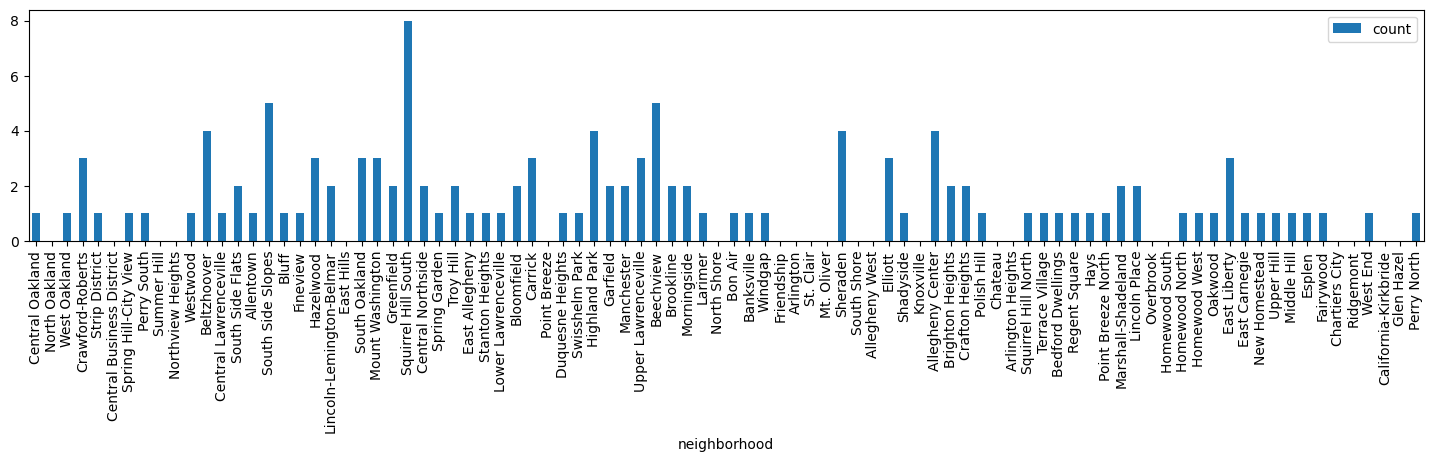

In [5]:
count_map.plot(x='hood', y ='count', kind='bar', figsize= (18,3), xlabel = "neighborhood")
plt.show()

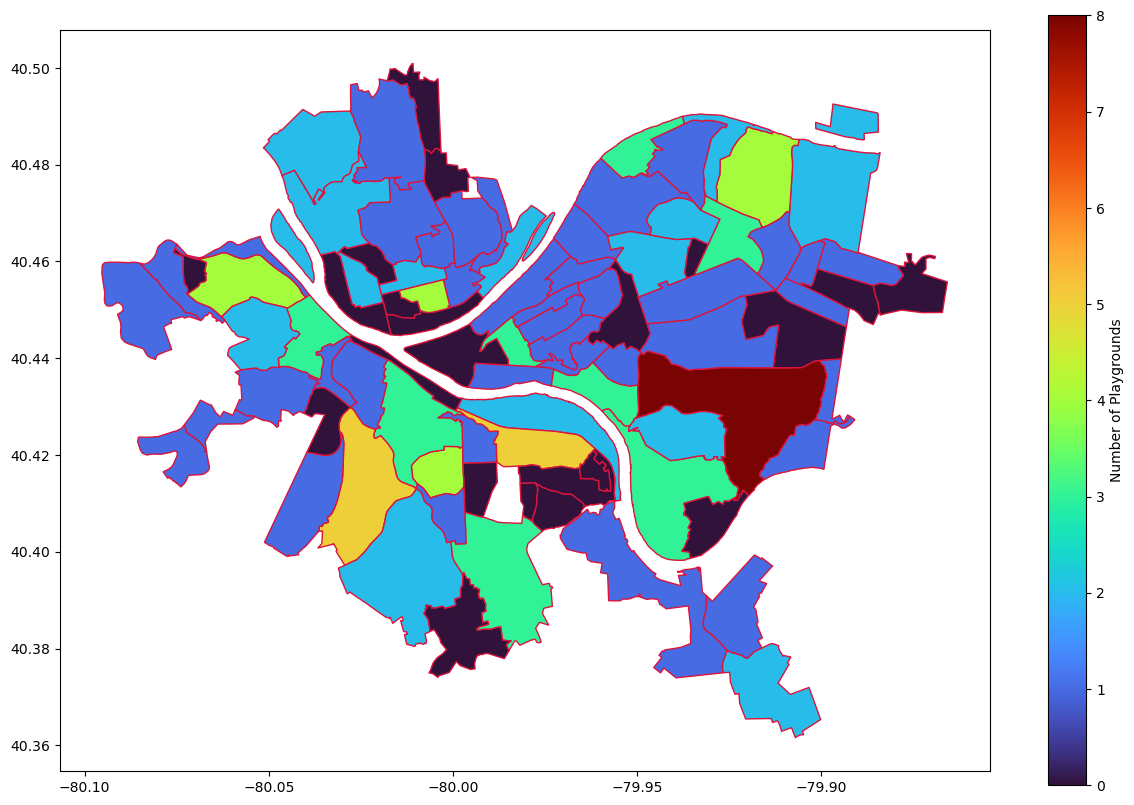

In [6]:
count_map.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               )
plt.show()

Looking at this chart, we can see that the nieborhood with most playgrounds is Squirrel Hill south, but there are many with no Playgrounds. 

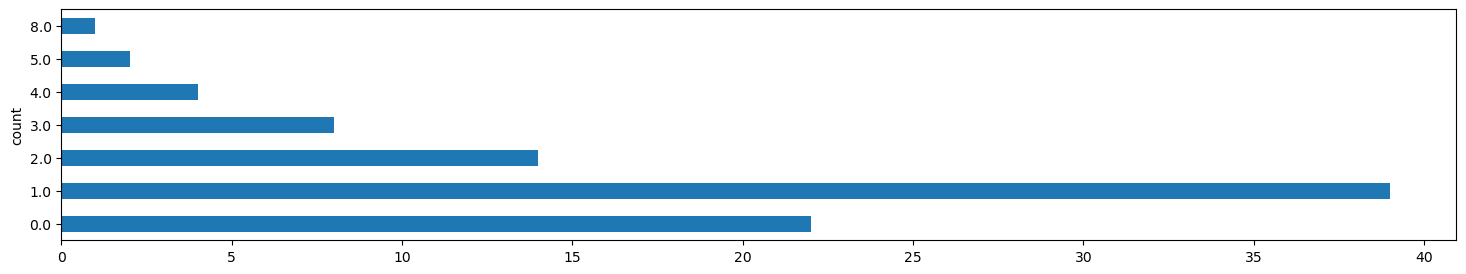

count
0.0    22
1.0    39
2.0    14
3.0     8
4.0     4
5.0     2
8.0     1
Name: count, dtype: int64

In [7]:
count_map["count"].value_counts().sort_index().plot(kind='barh', figsize= (18,3))
plt.show()
count_map["count"].value_counts().sort_index()

Looking at the data, there are 22 neiborhoods without playgrounds, thus using this data the number of viable canadates for most boring nieborhood can be narrowed down.

The narrowed list of those neighborhoods is below:

In [8]:
borings = count_map[count_map["count"] == 0]
borings["hood"]

1                 North Oakland
5     Central Business District
8                   Summer Hill
9             Northview Heights
20                   East Hills
33                 Point Breeze
44                  North Shore
48                   Friendship
49                    Arlington
50                    St. Clair
51                   Mt. Oliver
53                  South Shore
54               Allegheny West
57                    Knoxville
62                      Chateau
63            Arlington Heights
72                    Overbrook
73               Homewood South
84               Chartiers City
85                    Ridgemont
87         California-Kirkbride
88                   Glen Hazel
Name: hood, dtype: object

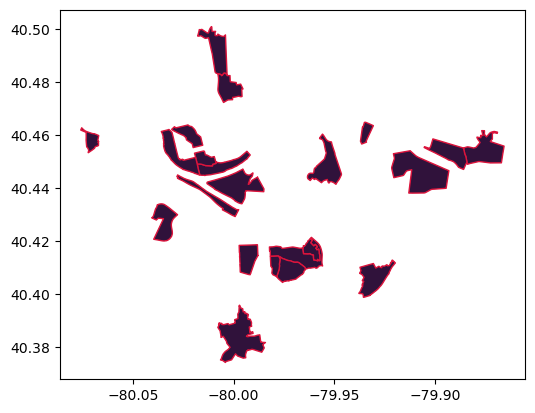

In [29]:
borings.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=False,              # show the legend
               )
plt.show()

# Noise - Juniper Ferlan #
Naturally, the most boring neighborhood in the city would be one where the residents and even visitors are quiet at all times. Whether they are always asleep or the neighborhood is just mostly deserted, a neighborhood that's quiet is a neighborhood that's bland. When nothing is going on, residents can feel secure knowing they're not missing out on anything important at all!

### So, how do we measure quietness? ###
With noise complaints! Since the non-emergency police phone line 311 takes all noise complaints, I found the [311 Data](https://data.wprdc.org/dataset/311-data) dataset.

In [13]:
# Read .csv of all up-to-date 311 calls
data = pd.read_csv("https://data.wprdc.org/datastore/dump/29462525-62a6-45bf-9b5e-ad2e1c06348d")

data.head()

_id  group_id  num_requests parent_closed status_name  status_code  \
0    1    827262             1             f        open            0   
1    2    720661             1             f        open            0   
2    3    722010             1             f        open            0   
3    4    846915             1             f        open            0   
4    5    853708             1             f        open            0   

                   dept request_type_name  request_type_id  \
0  DPW - Administration      Park Shelter              543   
1  DPW - Administration      Park Shelter              543   
2  DPW - Administration      Park Shelter              543   
3    Police - Zones 1-6   Illegal Parking              417   
4      DPW - Facilities     City Facility              375   

        create_date_et  ... cross_street_id        city neighborhood  \
0  2024-03-12T10:50:00  ...             NaN  Pittsburgh          NaN   
1  2023-03-20T07:52:00  ...             NaN  Pittsburgh          NaN   
2  2023-03-24T07:44:00  ...             NaN  Pittsburgh          NaN   
3  2024-05-19T12:24:00  ...             NaN  Pittsburgh          NaN   
4  2024-06-06T23:04:00  ...             NaN  Pittsburgh          NaN   

  census_tract council_district ward police_zone latitude  longitude  \
0          NaN              NaN  NaN         NaN      NaN        NaN   
1          NaN              NaN  NaN         NaN      NaN        NaN   
2          NaN              NaN  NaN         NaN      NaN        NaN   
3          NaN              NaN  NaN         NaN      NaN        NaN   
4          NaN              NaN  NaN         NaN      NaN        NaN   

       geo_accuracy  
0  NULL_COORDINATES  
1  NULL_COORDINATES  
2  NULL_COORDINATES  
3  NULL_COORDINATES  
4  NULL_COORDINATES  

[5 rows x 29 columns]

As you can see, there are a LOT of different requests for which the non-emergency line is called and the calls do not always need to be made from a particular neighborhood. Let's only show the relevant ones, where noise complaints are made for a specific neighborhood.

In [14]:
# Create and use mask to only show 311 calls where "Noise" is mentioned
mask = data['request_type_name'].str.contains('Noise')
noise = data[mask]

# Drop all irrelevant columns and all rows where no neighborhood is logged
noise = noise[['request_type_name', 'neighborhood']]
noise.dropna(inplace = True, ignore_index = True)

noise.head()

request_type_name               neighborhood
0  Excessive Noise/Disturbances  Central Business District
1  Excessive Noise/Disturbances              Highland Park
2                         Noise          Central Northside
3  Excessive Noise/Disturbances              Highland Park
4  Excessive Noise/Disturbances                    Bon Air

Much better! Now let's see how many noise complaints were made by each neighborhood and find the one(s) with the smallest amount.

In [15]:
noise2 = noise.groupby(['neighborhood']).size()
print(noise2.sort_values().head(10))

neighborhood
Glen Hazel           1
Hays                 1
Northview Heights    1
Ridgemont            1
Homewood West        2
New Homestead        2
Chartiers City       3
Arlington Heights    4
Bedford Dwellings    5
South Shore          5
dtype: int64


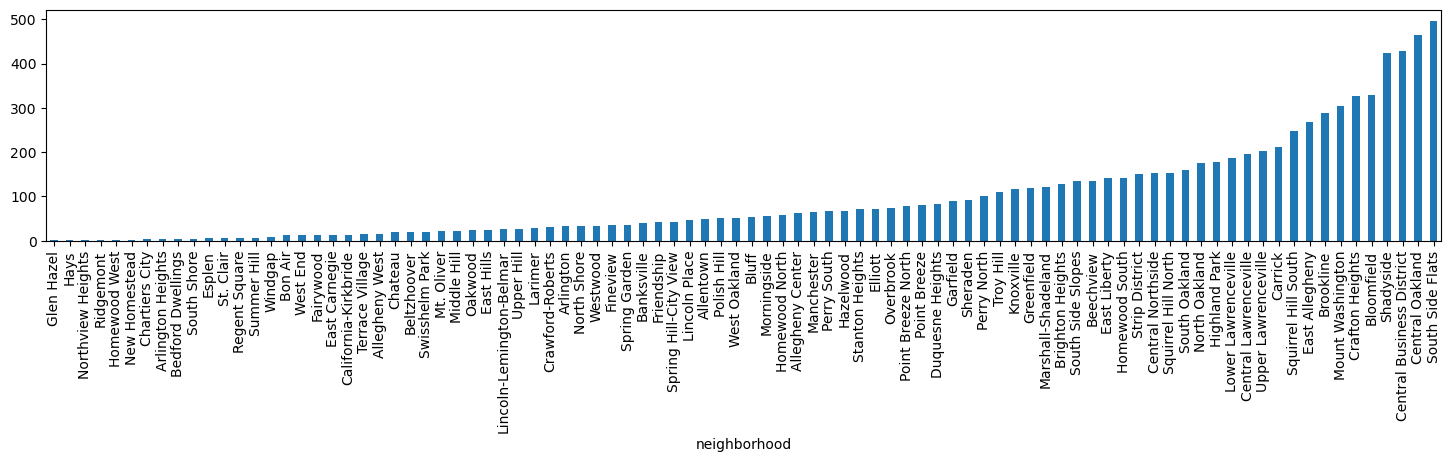

In [16]:
noise2.sort_values().plot(x='neighborhood', kind='bar', figsize=(18,3))
plt.show()

And there we go! As we can see, there's a handful of neighborhoods with noise complaint counts as low as one, those being Glen Hazel, Hays, Northview Heights, and Ridgemont. Since this dataset was gathered over the course of several years, that means that living in any of those neighborhoods means you are very unlikely to deal with unwanted noise. Think of how great you'll look after all the beauty sleep you'll get!

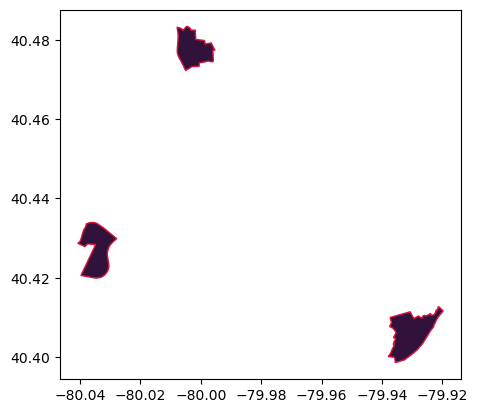

9     Northview Heights
85            Ridgemont
88           Glen Hazel
Name: hood, dtype: object

In [28]:
masknoise = []
for hoods in borings["hood"]:
    masknoise.append(noise2[hoods] == 1)
borings2 = borings[masknoise]
borings2.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=False,              # show the legend
               )
plt.show()
borings2["hood"]